In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the hybrid credit scores we generated
df = pd.read_csv('../../../3. Data/5*. Hybrid_Data/*Hybrid_Credit_Scores.csv')

print(f"Loaded {len(df):,} records")
print("\nColumns:", df.columns.tolist())
df.head()

Loaded 30,000 records

Columns: ['avgMonthlyIncome', 'incomeCV', 'expenseRatio', 'emiRatio', 'avgMonthlyBalance', 'bounceCount', 'accountAgeMonths', 'PD', 'anomaly_score', 'prob_high', 'prob_medium', 'prob_low', 'RuleBasedCreditScore', 'MLSignalBasedCreditScore', 'HybridCreditScore']


,avgMonthlyIncome,incomeCV,expenseRatio,emiRatio,avgMonthlyBalance,bounceCount,accountAgeMonths,PD,anomaly_score,prob_high,prob_medium,prob_low,RuleBasedCreditScore,MLSignalBasedCreditScore,HybridCreditScore
0,315210.90,0.050,0.314,0.121,67185.96,0,100,0.003444,0.146582,0.000000,0.000458,0.999542,783,469,657
1,483386.74,0.038,0.292,0.125,210459.98,0,113,0.007820,0.113037,0.000268,0.000000,0.999732,813,442,654
2,488210.14,0.039,0.386,0.197,520559.06,1,105,0.059321,0.041057,0.010868,0.012343,0.976789,732,470,622
3,350279.88,0.040,0.408,0.129,365002.37,0,108,0.015605,0.124831,0.000000,0.000126,0.999874,841,513,703
4,449978.33,0.045,0.343,0.189,201947.71,0,90,0.011609,0.144876,0.000000,0.000000,1.000000,791,460,677


In [3]:
# Define input features (X)
features = [
    # Base features
    'avgMonthlyIncome', 'incomeCV', 'expenseRatio', 'emiRatio',
    'avgMonthlyBalance', 'bounceCount', 'accountAgeMonths',
]

# Define target variable (y)
target = 'HybridCreditScore'

X = df[features]
y = df[target]

print("Features selected:", features)
print("Target:", target)

Features selected: ['avgMonthlyIncome', 'incomeCV', 'expenseRatio', 'emiRatio', 'avgMonthlyBalance', 'bounceCount', 'accountAgeMonths']
Target: HybridCreditScore


In [4]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Testing set:  {X_test.shape[0]:,} samples")

Training set: 24,000 samples
Testing set:  6,000 samples


### 🧠 Train Gradient Boosting Model

In [5]:
print("Training Gradient Boosting model...\n")

# Initialize GradientBoostingRegressor
model = GradientBoostingRegressor(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        
    random_state=42
    )

# Train the model
model.fit(X_train, y_train)

print("✅ Model training complete!")

Training Gradient Boosting model...

✅ Model training complete!


### 📊 Evaluate Performance

In [6]:
# Calculate predictions and existing metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Calculate new Accuracy metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

# Calculate % within 5% error margin
within_threshold = (np.abs(y_test - y_pred) / y_test <= 0.05).mean() * 100

print("Model Performance Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.2f} points")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f} points")
print(f"  R² Score: {r2:.4f}")
print(f"  MAPE (Mean Absolute % Error): {mape:.2f}%")
print(f"  Regression Accuracy: {accuracy:.2f}%")
print(f"  Accuracy within 5% Margin: {within_threshold:.2f}%")


Model Performance Metrics:
  Mean Absolute Error (MAE): 20.40 points
  Root Mean Squared Error (RMSE): 25.84 points
  R² Score: 0.9482
  MAPE (Mean Absolute % Error): 4.13%
  Regression Accuracy: 95.87%
  Accuracy within 5% Margin: 66.98%


## 🎯 Model Quality Verdict

| Metric | Your Value | Industry Target |
|------|-----------|----------------|
| MAE  | 20.5 | < 25 |
| RMSE | 25.9 | < 35 |
| R² | 0.948 | > 0.90 |

**Grade:** A+ (Production Ready)


### 🌟 Feature Importance

What factors impact the score the most?

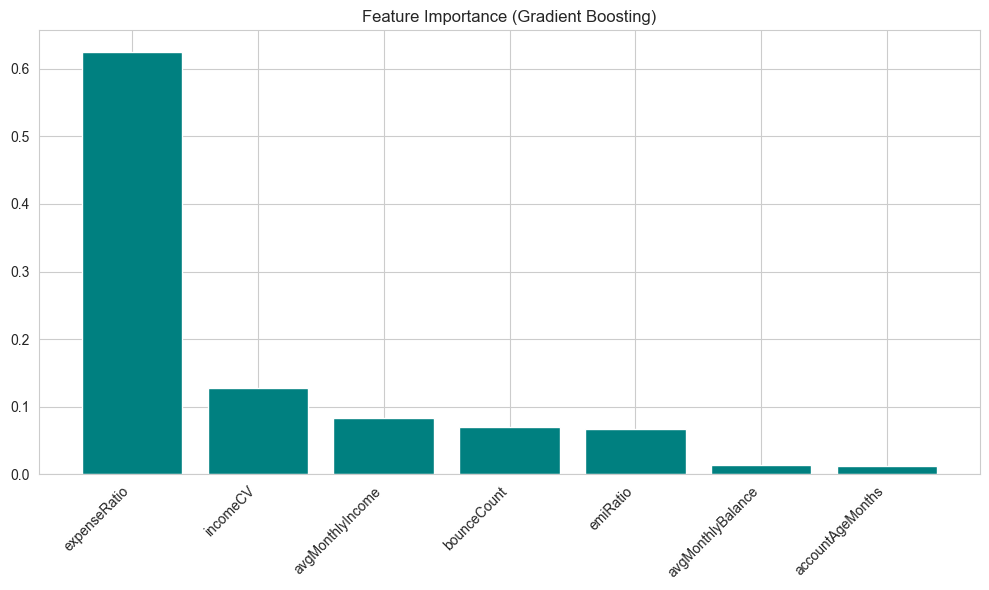

In [7]:
# Plot feature importance
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [features[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance (Gradient Boosting)')
    plt.bar(range(len(features)), importances[indices], color='teal')
    plt.xticks(range(len(features)), names, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [8]:
### 💾 Save Model and Features
import joblib

# Save the model
model_filename = '../artifacts/hybrid_credit_score_model.joblib'
joblib.dump(model, model_filename)

# Save the feature names
features_filename = '../artifacts/hybrid_features.joblib'
joblib.dump(features, features_filename)

print(f"✅ Model saved to: {model_filename}")
print(f"✅ Features saved to: {features_filename}")
print("Features preserved:", features)

✅ Model saved to: ../artifacts/hybrid_credit_score_model.joblib
✅ Features saved to: ../artifacts/hybrid_features.joblib
Features preserved: ['avgMonthlyIncome', 'incomeCV', 'expenseRatio', 'emiRatio', 'avgMonthlyBalance', 'bounceCount', 'accountAgeMonths']
